In [1]:
library(brms)
library(posterior)
library(bayesplot)
library(ggplot2)
library(dplyr)
library(tidyr)
library(knitr)
here::i_am("src/01b_basic_workflow.qmd")
options(
  brms.backend = "cmdstanr",
  cmdstanr_write_stan_file_dir = here::here("_brms-cache")
)
dir.create(here::here("_brms-cache"), showWarnings = FALSE)
set.seed(5886935)

Loading required package: Rcpp

Loading 'brms' package (version 2.23.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


This is posterior version 1.6.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


This is bayesplot version 1.14.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat


The following object is masked from ‘package:brms’:

    rhat



Attaching package: ‘dplyr’


The following objec

In [3]:
# load historical data on responses by arm from the RBesT package:
arm_data <- RBesT::AS
knitr::kable(arm_data)



|study   |   n|  r|
|:-------|---:|--:|
|Study 1 | 107| 23|
|Study 2 |  44| 12|
|Study 3 |  51| 19|
|Study 4 |  39|  9|
|Study 5 | 139| 39|
|Study 6 |  20|  6|
|Study 7 |  78|  9|
|Study 8 |  35| 10|

In [4]:
# use 4 cores for parallel sampling by default - only recommended if
# model takes > 1 minute to run for each chain otherwise the
# parallelization introduces substantial overhead.
options(mc.cores = 4)

In [5]:
model_meta_random <- bf(r | trials(n) ~ 1 + (1 | study), family=binomial)

In [6]:
?brmsfamily

brmsfamily {brms},R Documentation
family,"A character string naming the distribution family of the response variable to be used in the model. Currently, the following families are supported: gaussian, student, binomial, bernoulli, beta-binomial, poisson, negbinomial, geometric, Gamma, skew_normal, lognormal, shifted_lognormal, exgaussian, wiener, inverse.gaussian, exponential, weibull, frechet, Beta, dirichlet, von_mises, asym_laplace, gen_extreme_value, categorical, multinomial, dirichlet_multinomial, cumulative, cratio, sratio, acat, hurdle_poisson, hurdle_negbinomial, hurdle_gamma, hurdle_lognormal, hurdle_cumulative, zero_inflated_binomial, zero_inflated_beta_binomial, zero_inflated_beta, zero_inflated_negbinomial, zero_inflated_poisson, zero_one_inflated_beta, and xbeta."
link,A specification for the model link function. This can be a name/expression or character string. See the 'Details' section for more information on link functions supported by each family.
link_sigma,Link of auxiliary parameter sigma if being predicted.
link_shape,Link of auxiliary parameter shape if being predicted.
link_nu,Link of auxiliary parameter nu if being predicted.
link_phi,Link of auxiliary parameter phi if being predicted.
link_kappa,Link of auxiliary parameter kappa if being predicted.
link_beta,Link of auxiliary parameter beta if being predicted.
link_zi,Link of auxiliary parameter zi if being predicted.
link_hu,Link of auxiliary parameter hu if being predicted.


In [7]:
model_meta_fixed <- bf(r | trials(n) ~ 1, family=binomial)

In [8]:
kable(get_prior(model_meta_fixed, arm_data))



|prior                |class     |coef |group |resp |dpar |nlpar |lb |ub |tag |source  |
|:--------------------|:---------|:----|:-----|:----|:----|:-----|:--|:--|:---|:-------|
|student_t(3, 0, 2.5) |Intercept |     |      |     |     |      |   |   |    |default |

In [9]:
get_prior(model_meta_fixed, arm_data)
prior_meta_fixed  <- prior(normal(0, 2), class = Intercept)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,tag,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"student_t(3, 0, 2.5)",Intercept,,,,,,,,,default


In [10]:
kable(get_prior(model_meta_random, arm_data))



|prior                |class     |coef      |group |resp |dpar |nlpar |lb |ub |tag |source  |
|:--------------------|:---------|:---------|:-----|:----|:----|:-----|:--|:--|:---|:-------|
|student_t(3, 0, 2.5) |Intercept |          |      |     |     |      |   |   |    |default |
|student_t(3, 0, 2.5) |sd        |          |      |     |     |      |0  |   |    |default |
|                     |sd        |          |study |     |     |      |   |   |    |default |
|                     |sd        |Intercept |study |     |     |      |   |   |    |default |

In [11]:
prior_meta_random <- prior_meta_fixed +
    prior(normal(0,1), class=sd, coef=Intercept, group=study)

In [12]:
fit_meta_fixed  <- brm(model_meta_fixed, data=arm_data, prior=prior_meta_fixed,
                       ## setup Stan sampler to be more conservative, but more robust
                       control=list(adapt_delta=0.95),
                       ## these options silence Stan
                       refresh=0, silent=TRUE,
                       seed=4658758)

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.3 seconds.



In [13]:
fit_meta_random  <- brm(model_meta_random, data=arm_data, prior=prior_meta_random,
                        control=list(adapt_delta=0.95),
                        refresh=0, silent=TRUE,
                        seed=5868467)

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.2 seconds.
Chain 3 finished in 0.2 seconds.
Chain 4 finished in 0.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.2 seconds.
Total execution time: 0.3 seconds.



In [14]:
prior_meta_random_alt <- prior_meta_fixed +
    prior(normal(0,0.5), class=sd, coef=Intercept, group=study)
    
fit_meta_random_alt  <- update(fit_meta_random, prior=prior_meta_random_alt,
                               control=list(adapt_delta=0.95),
                               refresh=0, silent=TRUE,
                               seed=6845736)

The desired updates require recompiling the model

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 3 finished in 0.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.2 seconds.
Total execution time: 0.3 seconds.



In [15]:
prior_meta_random_alt <- prior_meta_fixed +
    prior(normal(0,0.5), class=sd, coef=Intercept, group=study)
    
fit_meta_random_alt2  <- update(fit_meta_random, newdata=slice_head(arm_data, n=4),
                                control=list(adapt_delta=0.95),
                                refresh=0, silent=TRUE,
                                seed=5868467)

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.3 seconds.



See https://mc-stan.org/misc/warnings for details.




In [16]:
kable(prior_summary(fit_meta_random))



|prior                |class     |coef      |group |resp |dpar |nlpar |lb |ub |tag |source  |
|:--------------------|:---------|:---------|:-----|:----|:----|:-----|:--|:--|:---|:-------|
|normal(0, 2)         |Intercept |          |      |     |     |      |   |   |    |user    |
|student_t(3, 0, 2.5) |sd        |          |      |     |     |      |0  |   |    |default |
|                     |sd        |          |study |     |     |      |   |   |    |default |
|normal(0, 1)         |sd        |Intercept |study |     |     |      |   |   |    |user    |

In [17]:
prior_meta_random  <- update(fit_meta_random, sample_prior="only",
                             control=list(adapt_delta=0.95),
                             refresh=0, silent=TRUE,
                             seed=5868467)

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.2 seconds.



In [18]:
print(fit_meta_random)

 Family: binomial 
  Links: mu = logit 
Formula: r | trials(n) ~ 1 + (1 | study) 
   Data: arm_data (Number of observations: 8) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~study (Number of levels: 8) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.38      0.22     0.04     0.88 1.00      949     1130

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.11      0.19    -1.50    -0.72 1.00     1287     1412

Draws were sampled using sample(hmc). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


In [19]:
fitted(fit_meta_random)

Estimate,Est.Error,Q2.5,Q97.5
24.339945,3.641673,17.433916,31.729265
11.473034,2.152996,7.557568,16.152270
16.040873,2.978572,11.124884,22.457115
9.471633,1.888219,5.875919,13.292480
37.585179,4.715231,29.046143,47.636613
5.369331,1.244309,3.190540,8.236522
13.674415,3.500076,7.321846,20.343072
9.348484,1.892999,6.030797,13.491045


In [20]:
fitted(fit_meta_fixed)

Estimate,Est.Error,Q2.5,Q97.5
26.495933,2.0301099,22.520775,30.589013
10.895524,0.8348115,9.260879,12.578659
12.628903,0.9676225,10.734201,14.579810
9.657396,0.7399466,8.208507,11.149266
34.419950,2.6372455,29.255960,39.737128
4.952511,0.3794598,4.209491,5.717572
19.314792,1.4798932,16.417013,22.298532
8.666894,0.6640546,7.366609,10.005752


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>.”


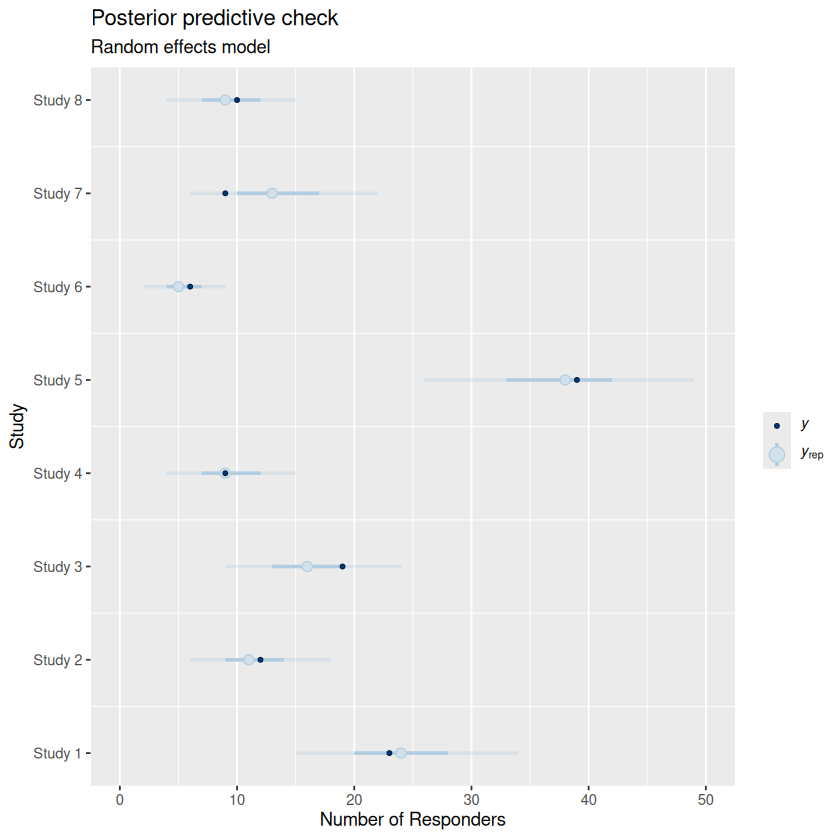

In [21]:
# create intervals plot and label plot accordingly
pp_check(fit_meta_random, type="intervals", ndraws=NULL) +
    scale_x_continuous("Study", breaks=1:nrow(arm_data), labels=arm_data$study) +
    ylab("Number of Responders") +
    coord_flip(ylim=c(0, 50)) +
    theme(legend.position="right",
          ## suppress vertical grid lines for better readability of intervals
          panel.grid.major.y = element_blank()) +
    ggtitle("Posterior predictive check", "Random effects model")

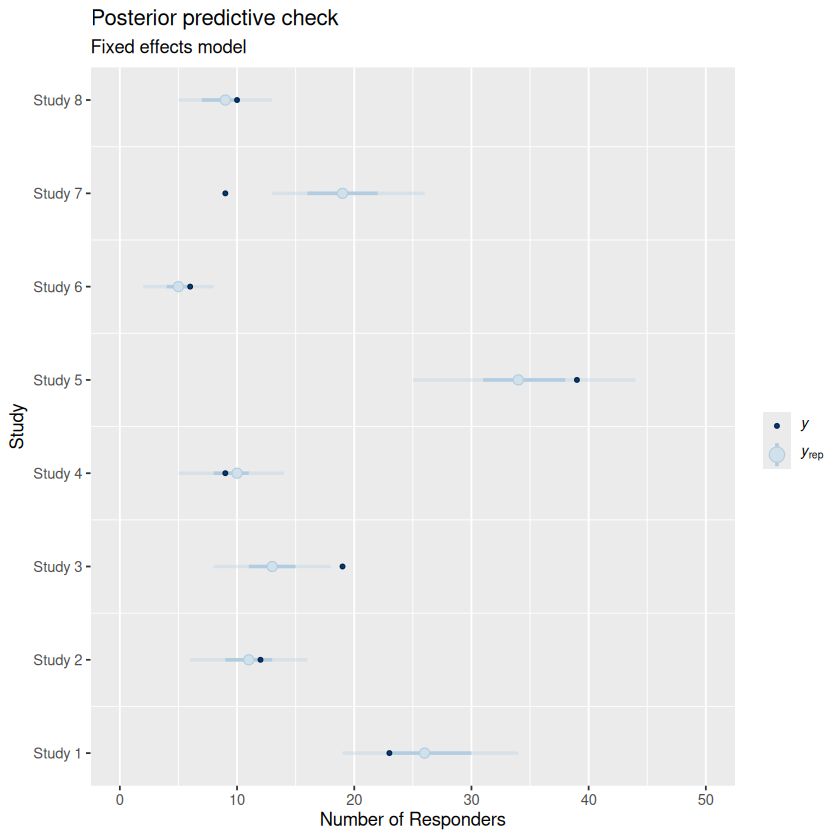

In [22]:
pp_check(fit_meta_fixed, type="intervals", ndraws=NULL) +
    scale_x_continuous("Study", breaks=1:nrow(arm_data), labels=arm_data$study) +
    ylab("Number of Responders") +
    coord_flip(ylim=c(0, 50)) +
    theme(legend.position="right",
          ## suppress vertical grid lines for better readability of intervals
          panel.grid.major.y = element_blank()) +
    ggtitle("Posterior predictive check", "Fixed effects model")

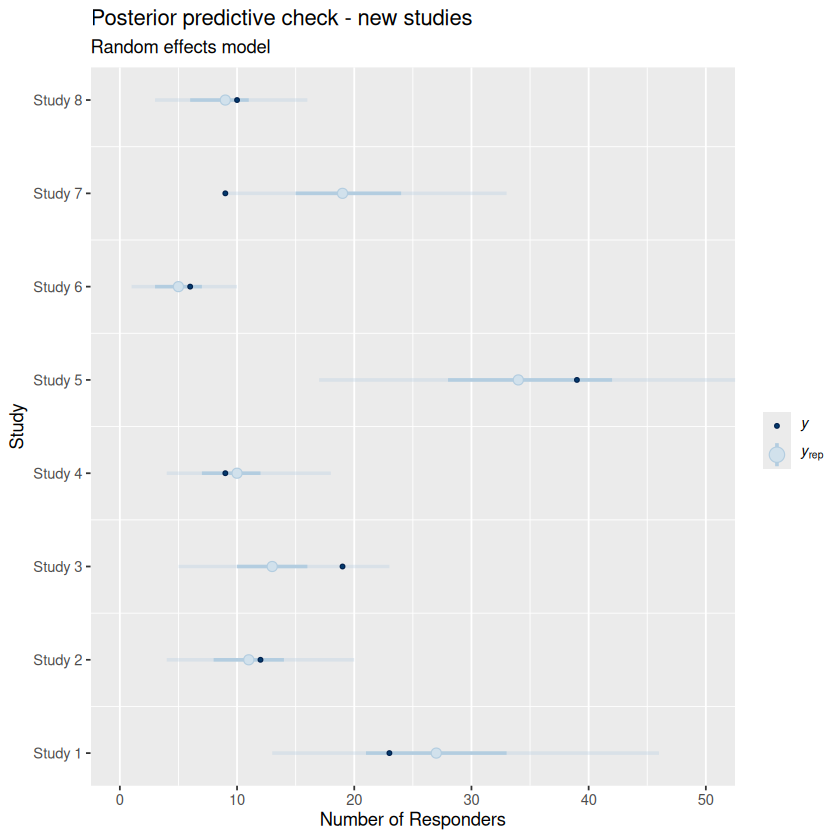

In [23]:
# create intervals plot and label plot accordingly
pp_arm_data_new <- posterior_predict(fit_meta_random,
                                     newdata=mutate(arm_data, study=paste0("new_", study)),
                                     allow_new_levels=TRUE,
                                     sample_new_levels="gaussian")

# use bayesplot::ppc_intervals directly here
ppc_intervals(y=arm_data$r, yrep=pp_arm_data_new) +
    scale_x_continuous("Study", breaks=1:nrow(arm_data), labels=arm_data$study) +
    ylab("Number of Responders") +
    coord_flip(ylim=c(0, 50)) +
    theme(legend.position="right",
          ## suppress vertical grid lines for better readability of intervals
          panel.grid.major.y = element_blank()) +
    ggtitle("Posterior predictive check - new studies", "Random effects model")

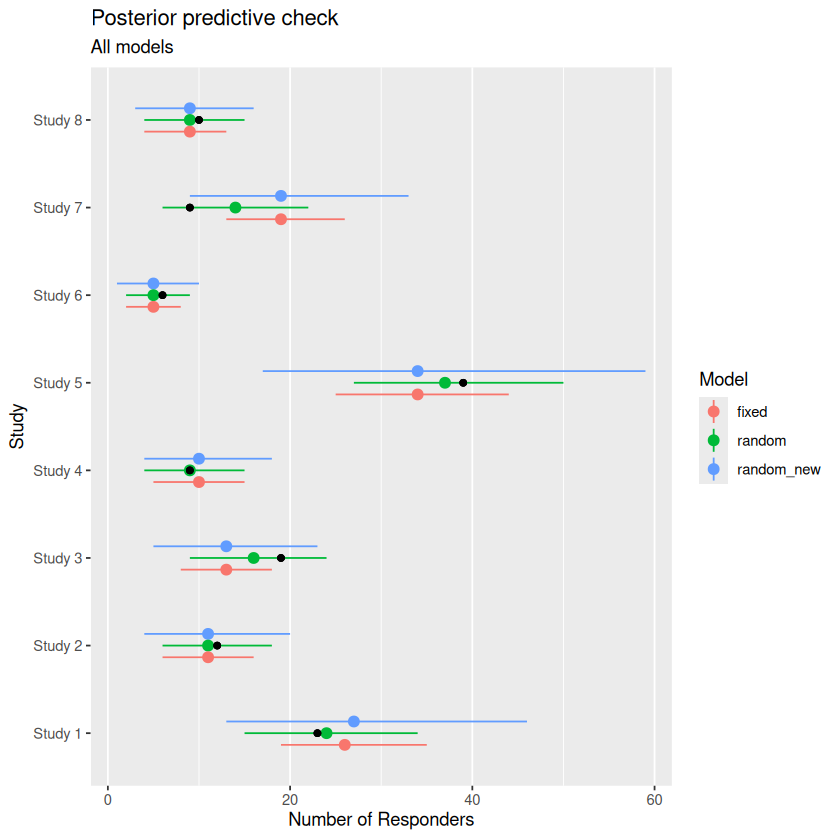

In [24]:
# use bayesplot::ppc_intervals_data directly here
model_cmp <- bind_rows(random_new=ppc_intervals_data(y=arm_data$r, yrep=pp_arm_data_new),
                       random=ppc_intervals_data(y=arm_data$r, yrep=posterior_predict(fit_meta_random)),
                       fixed=ppc_intervals_data(y=arm_data$r, yrep=posterior_predict(fit_meta_fixed)),
                       .id="Model") %>%
    # add in labels into the data-set
    left_join(select(mutate(arm_data, x=1:8), x, study), by="x")

ggplot(model_cmp, aes(study, m, colour=Model)) +
    geom_pointrange(aes(ymin=ll, ymax=hh), position=position_dodge(width=0.4)) +
    geom_point(aes(y=y_obs), colour="black") +
    ylab("Number of Responders") +
    xlab("Study") +
    coord_flip() +
    theme(legend.position="right",
          # suppress vertical grid lines for better readability of intervals
          panel.grid.major.y = element_blank()) +
    ggtitle("Posterior predictive check", "All models")